# 타이타닉 생존자 예측

- 데이터 읽기 및 확인

In [1]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


- 생존 상황 확인

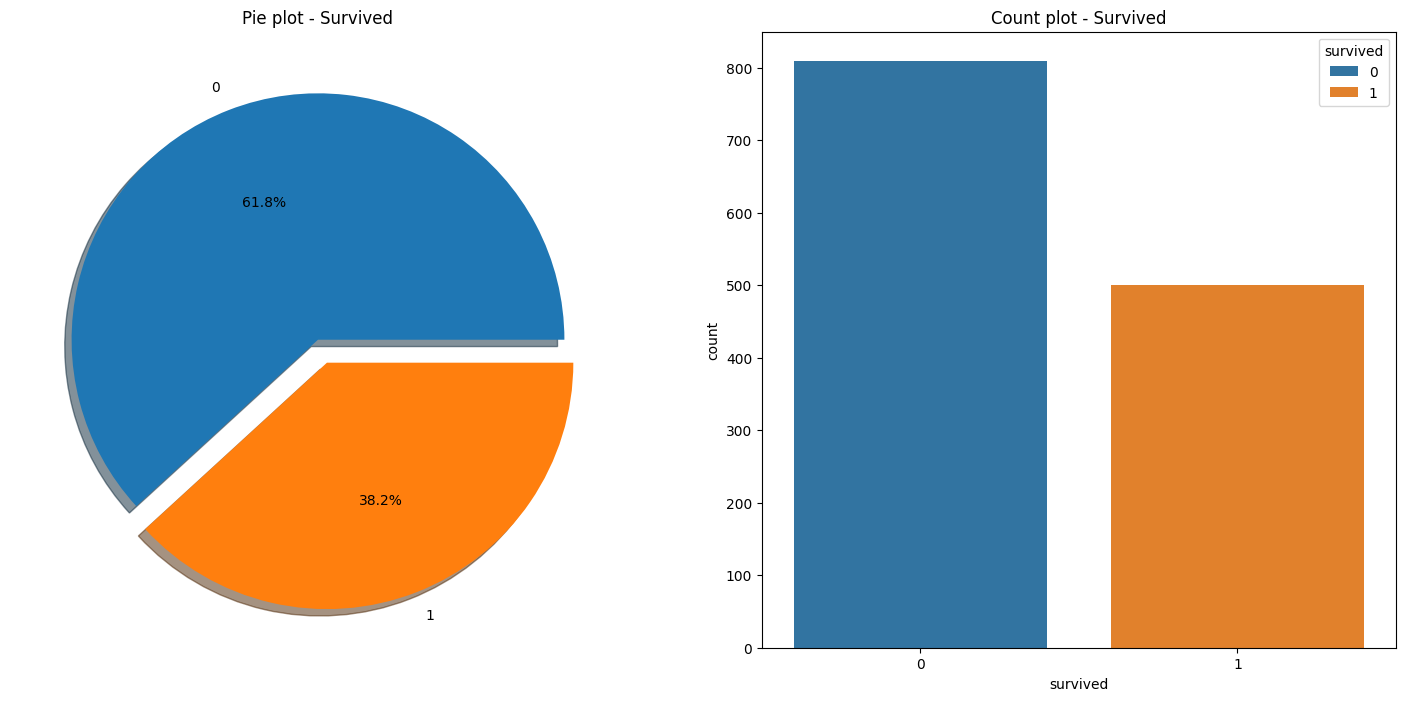

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['survived'].value_counts().plot.pie(explode=[0, 0.1],
                                            autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='survived', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

- 성별에 따른 생존 상황 분석

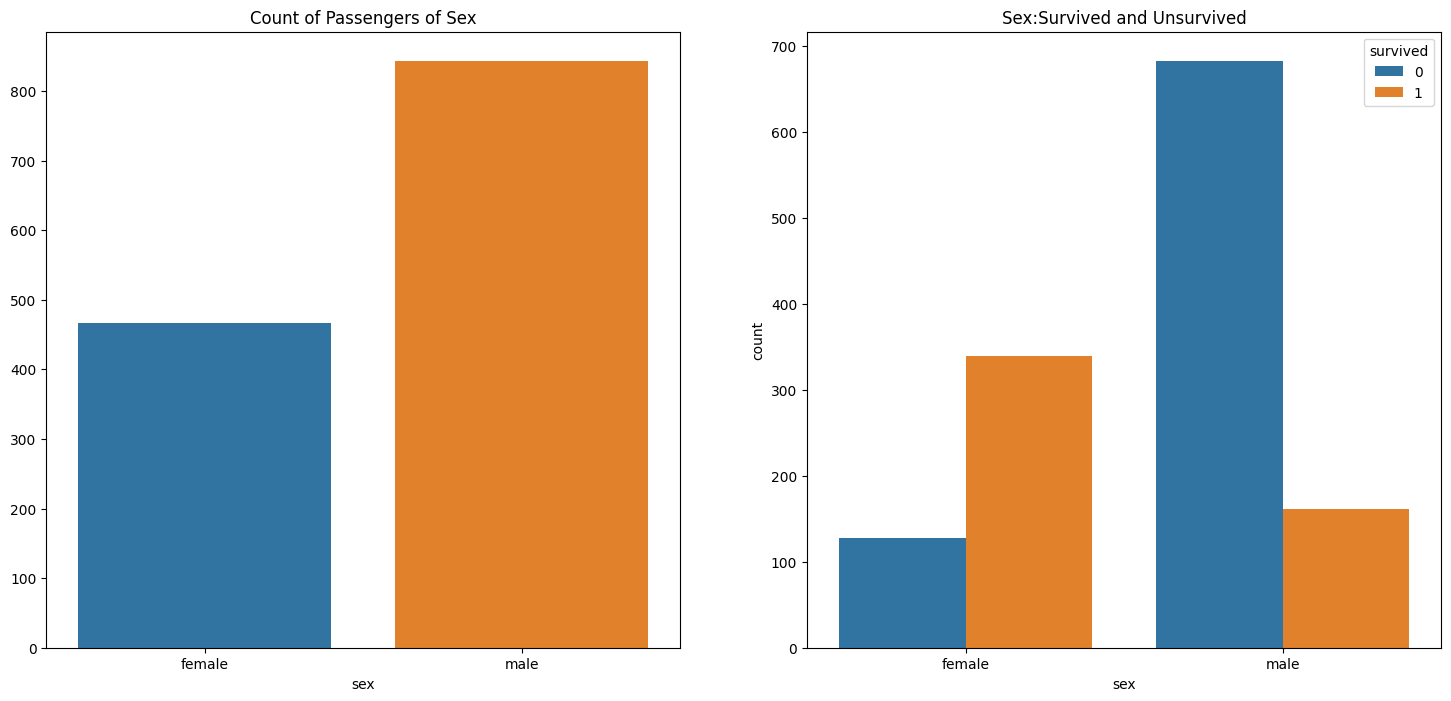

In [4]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(x='sex', hue='sex',  data=titanic, ax=ax[0])
ax[0].set_title('Count of Passengers of Sex')
ax[0].set_ylabel('')

sns.countplot(x='sex', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('Sex:Survived and Unsurvived')

plt.show()

- 경제력 대비 생존률

In [5]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


- 선실등급-성별 생존 현황

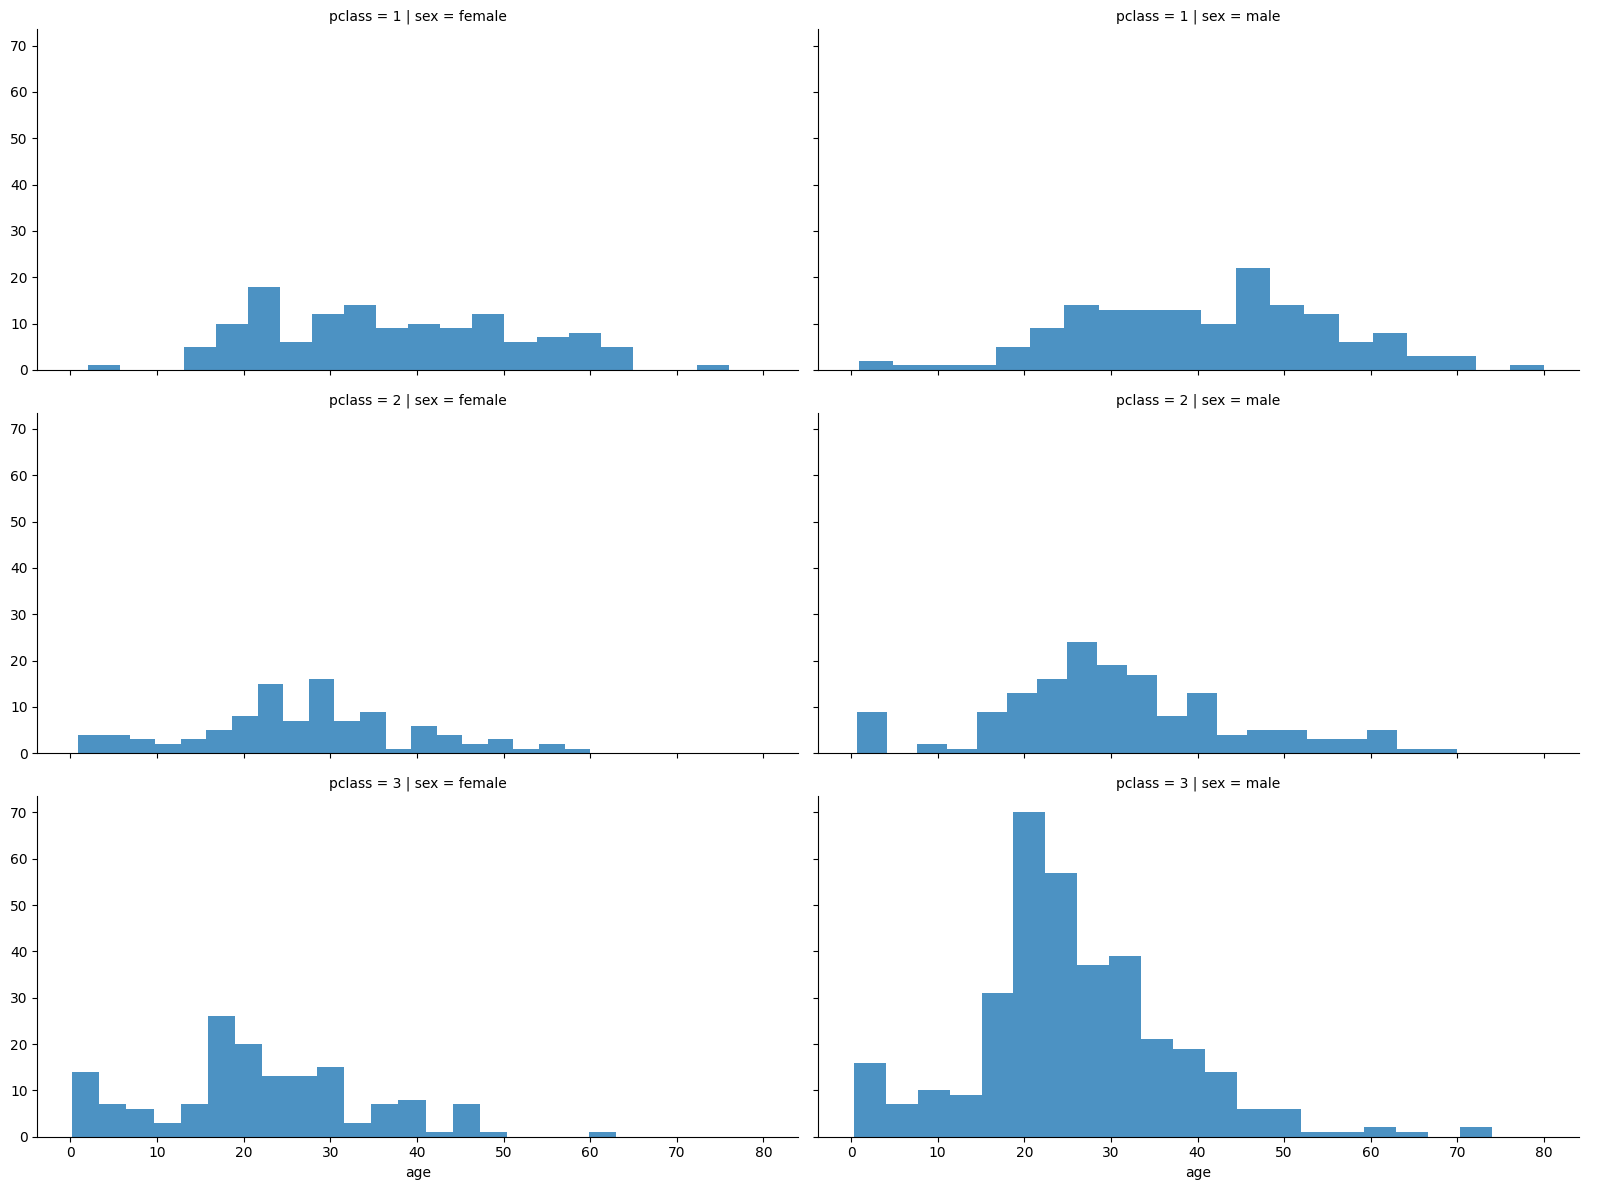

In [6]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.8, bins=20)
grid.add_legend()

- 나이별 승객 현황

In [7]:
import plotly.express as px

fig = px.histogram(titanic, x='age')
fig.show()

- 선실등급-나이 생존 현황

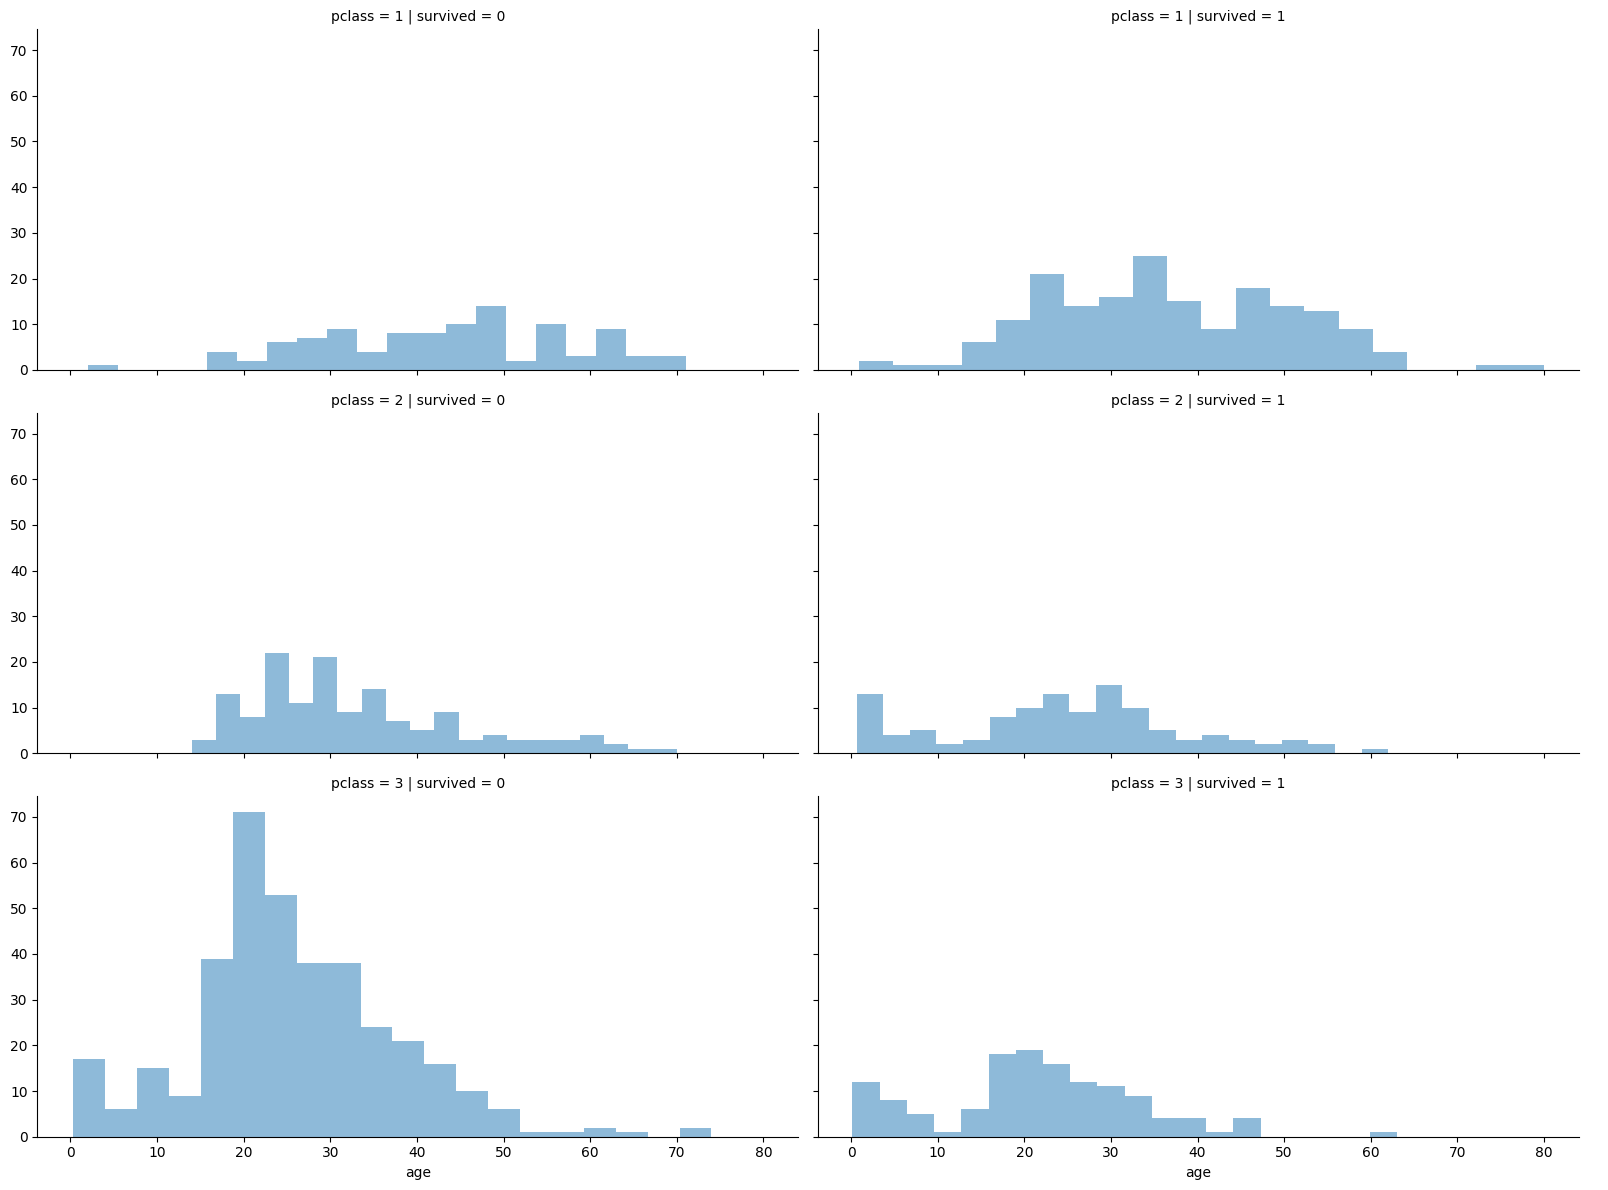

In [8]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend()

In [9]:
titanic['age_cat'] = pd.cut(titanic['age'], bins=[0,7,15,30,60,100],
                            include_lowest=True,
                            labels=['baby', 'teen', 'young', 'adult', 'old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


- 나이, 성별, 등급별 생존자 수 한번에 파악하기
  - 나이, 성별, 등급 간의 관계 눈으로 파악
  - 나이가 어릴수록, 등급이 높을 수록 생존 확률이 높으며 대게 여성이 생존 확률이 더 높음을 알 수 있음

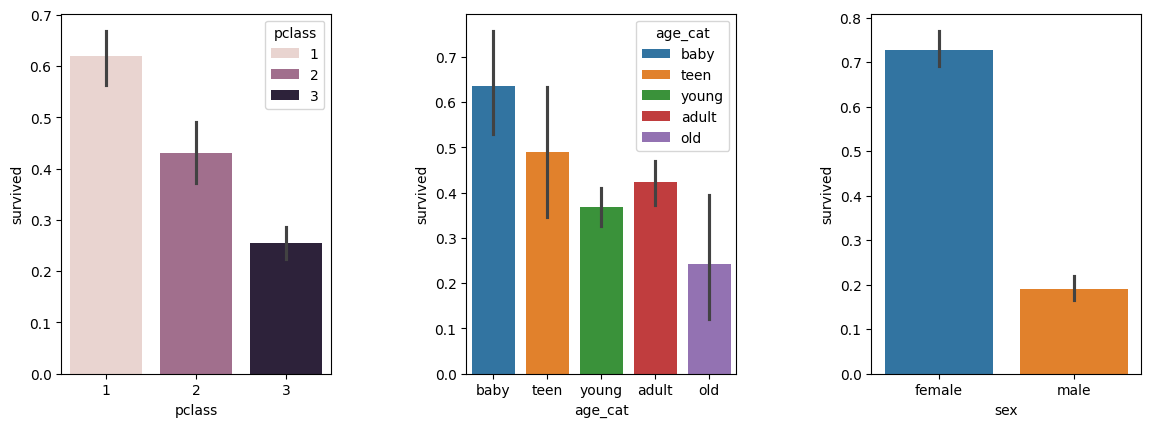

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.barplot(x='pclass', y='survived', hue='pclass', data=titanic)
plt.subplot(132)
sns.barplot(x='age_cat', y='survived', hue='age_cat', data=titanic)
plt.subplot(133)
sns.barplot(x='sex', y='survived', hue='sex', data=titanic)
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)

- 남/여 나이별 생존 상황

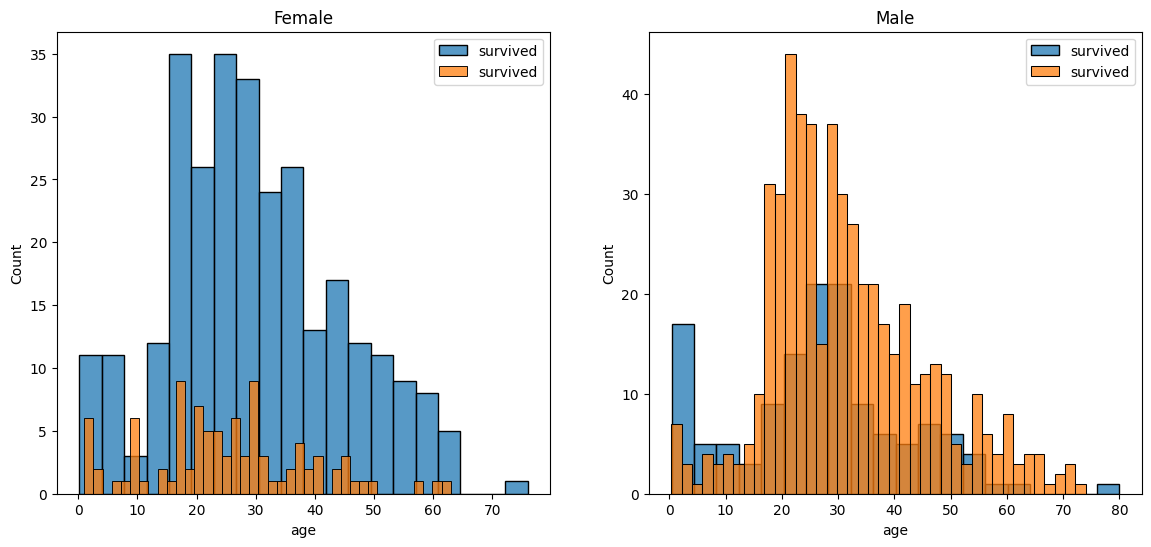

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

ax = sns.histplot(women[women['survived']==1]['age'], bins=20,
                  label='survived', ax=axes[0], kde=False)
ax = sns.histplot(women[women['survived']==0]['age'], bins=40,
                  label='survived', ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.histplot(men[men['survived']==1]['age'], bins=20,
                  label='survived', ax=axes[1], kde=False)
ax = sns.histplot(men[men['survived']==0]['age'], bins=40,
                  label='survived', ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')
plt.show()

- 사회적 신분 확인

In [12]:
for idx, dataset in titanic.iterrows():
    print(dataset['name'])

Allen, Miss. Elisabeth Walton
Allison, Master. Hudson Trevor
Allison, Miss. Helen Loraine
Allison, Mr. Hudson Joshua Creighton
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Anderson, Mr. Harry
Andrews, Miss. Kornelia Theodosia
Andrews, Mr. Thomas Jr
Appleton, Mrs. Edward Dale (Charlotte Lamson)
Artagaveytia, Mr. Ramon
Astor, Col. John Jacob
Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Aubart, Mme. Leontine Pauline
Barber, Miss. Ellen "Nellie"
Barkworth, Mr. Algernon Henry Wilson
Baumann, Mr. John D
Baxter, Mr. Quigg Edmond
Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Bazzani, Miss. Albina
Beattie, Mr. Thomson
Beckwith, Mr. Richard Leonard
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
Behr, Mr. Karl Howell
Bidois, Miss. Rosalie
Bird, Miss. Ellen
Birnbaum, Mr. Jakob
Bishop, Mr. Dickinson H
Bishop, Mrs. Dickinson H (Helen Walton)
Bissette, Miss. Amelia
Bjornstrom-Steffansson, Mr. Mauritz Hakan
Blackwell, Mr. Stephen Weart
Blank, Mr. Henry
Bonnell, Miss. Caroline
Bonnell, Miss

In [13]:
import re

for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    print(idx)
    print(re.search('\,\s\w+(\s\w+)?\.', tmp).group())

0
, Miss.
1
, Master.
2
, Miss.
3
, Mr.
4
, Mrs.
5
, Mr.
6
, Miss.
7
, Mr.
8
, Mrs.
9
, Mr.
10
, Col.
11
, Mrs.
12
, Mme.
13
, Miss.
14
, Mr.
15
, Mr.
16
, Mr.
17
, Mrs.
18
, Miss.
19
, Mr.
20
, Mr.
21
, Mrs.
22
, Mr.
23
, Miss.
24
, Miss.
25
, Mr.
26
, Mr.
27
, Mrs.
28
, Miss.
29
, Mr.
30
, Mr.
31
, Mr.
32
, Miss.
33
, Miss.
34
, Mr.
35
, Miss.
36
, Miss.
37
, Mr.
38
, Mr.
39
, Mr.
40
, Dr.
41
, Mrs.
42
, Mrs.
43
, Mrs.
44
, Miss.
45
, Major.
46
, Mr.
47
, Mr.
48
, Mrs.
49
, Mr.
50
, Mrs.
51
, Mr.
52
, Mr.
53
, Mr.
54
, Master.
55
, Miss.
56
, Mr.
57
, Mrs.
58
, Mr.
59
, Mrs.
60
, Mr.
61
, Mrs.
62
, Mr.
63
, Mrs.
64
, Mr.
65
, Mrs.
66
, Miss.
67
, Miss.
68
, Mr.
69
, Mrs.
70
, Mr.
71
, Mr.
72
, Mrs.
73
, Miss.
74
, Mr.
75
, Mr.
76
, Miss.
77
, Mr.
78
, Mrs.
79
, Mrs.
80
, Mr.
81
, Capt.
82
, Miss.
83
, Mrs.
84
, Mr.
85
, Mrs.
86
, Mr.
87
, Mr.
88
, Miss.
89
, Mr.
90
, Mrs.
91
, Mr.
92
, Mrs.
93
, Dr.
94
, Master.
95
, Mrs.
96
, Mr.
97
, Mrs.
98
, Mrs.
99
, Lady.
100
, Sir.
101
, Mr.
1

In [14]:
title = []

for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:])

titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss.
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master.
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss.
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr.
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs.


In [15]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt.,0,1
Col.,0,4
Don.,0,1
Dona.,1,0
Dr.,1,7
Jonkheer.,0,1
Lady.,1,0
Major.,0,2
Master.,0,61


In [16]:
titanic['title'] = titanic['title'].replace('Mile', 'Miss')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Dr', 'Lady', 'the Countess']
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Master']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

titanic['title'].unique()

array(['Miss.', 'Master.', 'Mr.', 'Mrs.', 'Col.', 'Mme.', 'Dr.', 'Major.',
       'Capt.', 'Lady.', 'Sir.', 'Mlle.', 'Dona.', 'Jonkheer.',
       'the Countess.', 'Don.', 'Rev.', 'Ms.'], dtype=object)

In [17]:
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Capt.,0.000000
1,Col.,0.500000
2,Don.,0.000000
3,Dona.,1.000000
4,Dr.,0.500000
5,Jonkheer.,0.000000
6,Lady.,1.000000
7,Major.,0.500000
8,Master.,0.508197
9,Miss.,0.676923


# 머신러닝을 이용한 생존자 예측

- 간단한 구조 확인

In [18]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


In [19]:
titanic['sex'].unique()

array(['female', 'male'], dtype=object)

- 데이터 라벨링

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss.,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master.,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss.,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr.,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs.,0


In [21]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(8)
memory usage: 140.0+ KB


- Diffusion matrix 표현

In [22]:
titanic_matrix = titanic[titanic.columns[titanic.dtypes != 'object']].drop('age_cat', axis=1)

<Axes: >

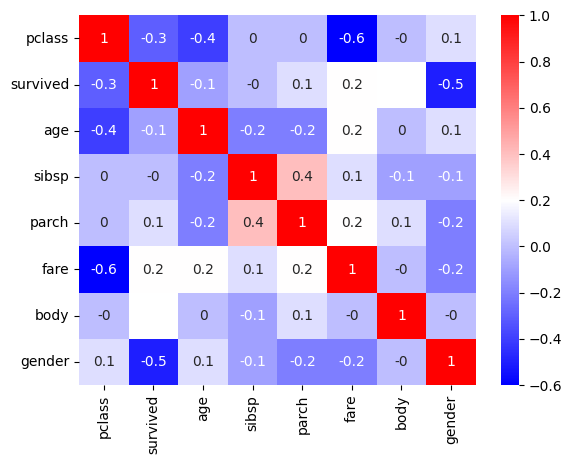

In [23]:
correlation_matrix = titanic_matrix.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

- sklearn 머신러닝 알고리즘 활용하기
  - DecisionTree

In [24]:
from sklearn.model_selection import train_test_split

x = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(x_train, y_train)

pred = dt.predict(x_test)
print(accuracy_score(y_test, pred))

0.7655502392344498


In [26]:
import warnings

# 경고메세지 끄기
warnings.filterwarnings(action='ignore')


In [40]:
import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
print(f'\n생존확률 Decaprio : {dt.predict_proba(dicaprio)[0, 1]*100:.2f}%')


생존확률 Decaprio : 16.73%


In [41]:
winslet = np.array([[1, 16, 1, 1, 100, 0]])
print(f'\n생존확률 Winslet : {dt.predict_proba(winslet)[0, 1]*100:.2f}%')


생존확률 Winslet : 100.00%
